In [15]:
import os
import sys
from io import BytesIO
from pathlib import Path

import matplotlib.pyplot as plt
import msgpack
import polars as pl
from PIL import Image


In [9]:
data_path = Path("../data/raw/LDoGI/shards/")
data_path = data_path.resolve().absolute()
print(data_path)

/home/dkeni/Projects/Locus/locus-model/data/raw/LDoGI/shards


In [10]:
data_files = data_path.glob("*.msg")
first_file = next(data_files)

In [11]:
def format_size(size: int, uom: str="kb")-> str:
    assert uom in ["b", "kb", "Mb"]
    if uom == "b":
        return f"{size:.02f} b"
    elif uom == "kb":
        return f"{size / 1024:.02f} kb"
    elif uom == "Mb":
        return f"{size / 1024 / 1024:.02f} Mb"
    else:
        return f"{size:.02f} b"

In [12]:


msg_size = os.path.getsize(first_file)
print(format_size(msg_size, "Mb"))

691.42 Mb


In [42]:
with open(first_file, "rb") as infile:
    gene = msgpack.Unpacker(infile, raw=False)
    print(type(gene))
    print(format_size(sys.getsizeof(gene)))
    print(gene)

    ids = []
    lats = []
    longs = []
    ims = []

    for record in msgpack.Unpacker(infile, raw=False):
        ids.append(record["id"])
        lats.append(record["latitude"])
        longs.append(record["longitude"])
        ims.append(record["image"])

<class 'msgpack._cmsgpack.Unpacker'>
40.27 kb


In [43]:
# Define dataframe
data = {
            "id": ids,
            "latitude": lats,
            "longitude": longs,
            "image": ims,
        }
schema= {
            "id": pl.Utf8,
            "latitude": pl.Float64,
            "longitude": pl.Float64,
            "image": pl.Binary,
        }
df = pl.DataFrame(data, schema)


In [27]:
df.shape

(29999, 4)

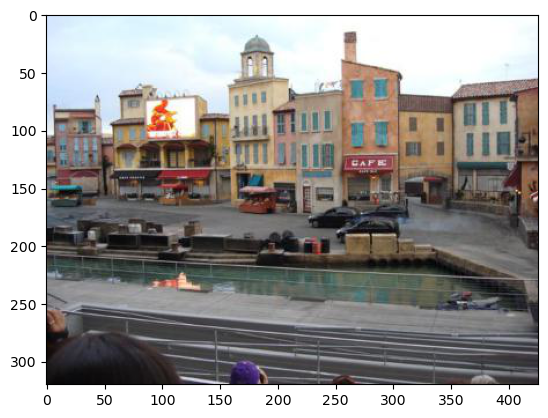

In [44]:
plt.imshow(Image.open(BytesIO(df[29698]["image"].item())))
plt.show()

In [ ]:
LDoGI_processed_data_path = 

In [46]:
first_file.stem

'shard_0'

In [ ]:
df.write_parquet()